In [64]:
import numpy as np
import os
import cv2
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

'2.2.2'

In [65]:
train_data_dir = 'C:\\image\\RSP\\train'
test_data_dir = 'C:\\image\\RSP\\test'

In [66]:
class_name = os.listdir(train_data_dir)
print(class_name)

['paper', 'rock', 'scissors']


In [110]:
train_input = []
train_label = []
test_input = []
test_label = []

In [111]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [112]:
for i in range(len(class_name)):
    path = os.path.join(train_data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
        img = cv2.Canny(img, 100,200)
        img = img.reshape((150, 150, 1))
        train_input.append(img)
        train_label.append(onehot_encoded[i])

In [85]:
for i in range(len(class_name)):
    path = os.path.join(test_data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
        img = cv2.Canny(img, 100,200)
        img = img.reshape((150, 150, 1))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [89]:
#read(color) -> cvtColor -> canny -> resize
for i in range(len(class_name)):
    path = os.path.join(test_data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.Canny(img, 100,200)
        img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 1))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [113]:
#read(gray)-> canny -> resize
for i in range(len(class_name)):
    path = os.path.join(test_data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.Canny(img, 100,200)
        img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 1))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [122]:
print(len((train_input)))
print(len(train_label))
print(len(test_input))
print(len(test_label))

85
85
15
15


In [123]:
train_input = np.array(train_input)
train_label = np.array(train_label)
test_input = np.array(test_input)
test_label = np.array(test_label)
print(train_input.shape)
print(test_input.shape)

(85, 150, 150, 1)
(15, 150, 150, 1)


In [125]:
sample = train_input[0].reshape(150, 150)
sample2 = test_input[0].reshape(150, 150)
# sample = train_input[0].reshape((150, 150, 3))

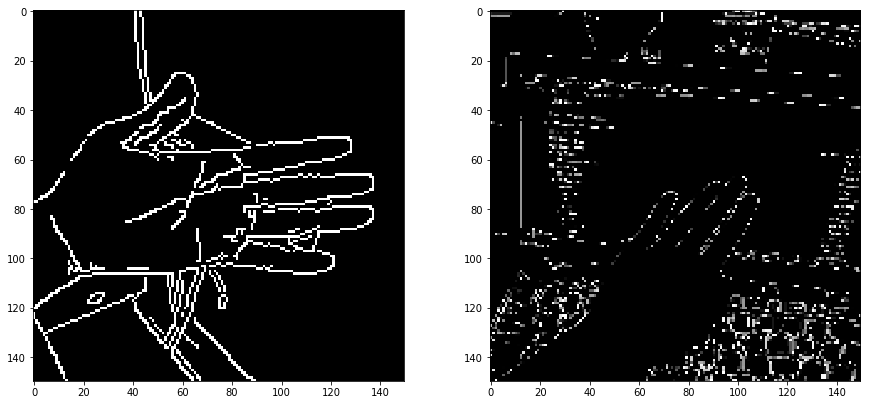

In [126]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(sample, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(sample2, cmap = 'gray')
plt.show()

In [127]:
print(train_input.shape)
print(train_label.shape)

(85, 150, 150, 1)
(85, 3)


In [128]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, train_input.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(34, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'softmax'))

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 34)        19618     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 34)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 32)        9824      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)              0         
__________

In [130]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [131]:
loss_type = 'mean_squared_error', 'binary_crossentropy', 'categorical_crossentropy'

In [132]:
model.fit(x = train_input, y = train_label, batch_size = 5, epochs = 10)

Epoch 1/10
85/85 [==============================] - 4s 45ms/step - loss: 10.8318 - acc: 0.3176
Epoch 2/10
85/85 [==============================] - 3s 40ms/step - loss: 10.9982 - acc: 0.3176
Epoch 3/10
85/85 [==============================] - 3s 38ms/step - loss: 10.9982 - acc: 0.3176
Epoch 4/10
85/85 [==============================] - 4s 43ms/step - loss: 10.9982 - acc: 0.3176
Epoch 5/10
85/85 [==============================] - 3s 41ms/step - loss: 10.9982 - acc: 0.3176
Epoch 6/10
85/85 [==============================] - 3s 41ms/step - loss: 10.9982 - acc: 0.3176
Epoch 7/10
85/85 [==============================] - 3s 41ms/step - loss: 10.9982 - acc: 0.3176
Epoch 8/10
85/85 [==============================] - 4s 43ms/step - loss: 10.9982 - acc: 0.3176
Epoch 9/10
85/85 [==============================] - 4s 43ms/step - loss: 10.9982 - acc: 0.3176
Epoch 10/10
85/85 [==============================] - 4s 45ms/step - loss: 10.9982 - acc: 0.3176


In [102]:
loss_and_accuracy = model.evaluate(x = test_input, y = test_label)
print(loss_and_accuracy)

ValueError: Error when checking input: expected conv2d_5_input to have shape (150, 150, 3) but got array with shape (150, 150, 1)

In [46]:
yhat_test = model.predict(test_input, batch_size=32)

In [47]:
print(yhat_test)

[[6.3258487e-01 5.5560325e-03 3.6185911e-01]
 [4.5745784e-01 7.4060299e-05 5.4246807e-01]
 [2.8965262e-01 1.2862668e-04 7.1021873e-01]
 [4.2666191e-01 4.9686864e-02 5.2365124e-01]
 [8.2958126e-01 7.5958520e-02 9.4460167e-02]
 [8.2513016e-01 1.3032659e-02 1.6183722e-01]
 [1.0135648e-01 3.0443387e-04 8.9833909e-01]
 [7.1548093e-03 6.7363115e-05 9.9277776e-01]
 [3.1287614e-02 5.9537774e-06 9.6870643e-01]
 [1.1783106e-01 8.1024499e-04 8.8135868e-01]
 [3.3346659e-01 3.3091442e-03 6.6322428e-01]
 [5.1850765e-03 2.9109742e-06 9.9481201e-01]
 [6.5349191e-02 2.3936609e-05 9.3462688e-01]
 [2.4071796e-01 1.4344592e-03 7.5784755e-01]
 [7.3546016e-01 1.3670786e-02 2.5086904e-01]]


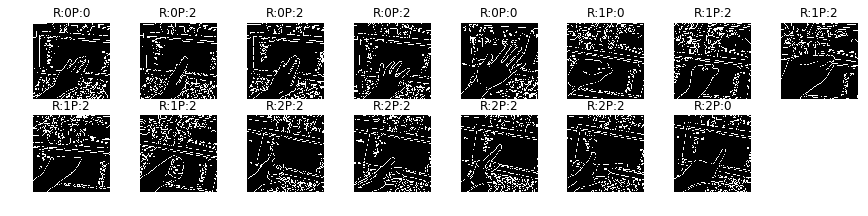

In [52]:
plt.figure(figsize=(15, 15))

for i in range(len(test_input)):
    plt.subplot(9, 8, i + 1)
    plt.axis('off')
    img = test_input[i].reshape(150, 150)
    plt.imshow(img, cmap = 'gray')
    plt.title('R:' + str(np.argmax(test_label[i])) + 'P:' + str(np.argmax(yhat_test[i])))

In [ ]:
for i in range(len(test_input)):
    plt.subplot(9, 8, i + 1)
    plt.axis('off')
    img = test_input[i].reshape(150, 150)
    plt.imshow(img, cmap = 'gray')